# Multidimensional tests - Travel Reviews

Referência principal:
- https://archive.ics.uci.edu/ml/datasets/Travel+Reviews

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

O dataframe que estamos usando se refere à notas dadas por viajantes na plataforma Trip Advisor para diferentes destinos no leste asiático. As notas dadas variam de 0 a 4, sendo Excellent (4), Very Good (3), Average (2), Poor (1), e Terrible (0). O score médio é usado para cada categoria por usuário. As colunas são indexadas conforme a descrição abaixo:
- Attribute 1 : Unique user id
- Attribute 2 : Average user feedback on art galleries
- Attribute 3 : Average user feedback on dance clubs
- Attribute 4 : Average user feedback on juice bars
- Attribute 5 : Average user feedback on restaurants
- Attribute 6 : Average user feedback on museums
- Attribute 7 : Average user feedback on resorts
- Attribute 8 : Average user feedback on parks/picnic spots
- Attribute 9 : Average user feedback on beaches
- Attribute 10 : Average user feedback on theaters
- Attribute 11 : Average user feedback on religious institutions

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data_vis/tripadvisor_review.csv')
df

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [4]:
rename_column = {
    'Category 1' : 'art_galleries',
    'Category 2' : 'dance_clubs',
    'Category 3' : 'juice_bars',
    'Category 4' : 'restaurants',
    'Category 5' : 'museums',
    'Category 6' : 'resorts',
    'Category 7' : 'parks',
    'Category 8' : 'beaches',
    'Category 9' : 'theaters',
    'Category 10' : 'religious_institutions'
}

In [5]:
df = df.rename(columns=rename_column)

In [6]:
df = df.drop(['User ID'], axis=1)
columns = df.columns.values
df

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


Vamos criar uma coluna de target, mais no intuito de colorir nossas projeções. A estratégia adotada será a seguinte: o maior score dentre as colunas será o target da localidade.

In [7]:
df['destino_para'] = df.idxmax(axis=1)
df

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions,destino_para
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,parks
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,parks
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,parks
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,parks
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,parks
...,...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,religious_institutions
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,parks
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,parks
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,parks


Leste asiático tem parques pra dar e vender!

In [8]:
df.destino_para.value_counts()

parks                     790
religious_institutions    161
beaches                    15
resorts                     8
museums                     2
art_galleries               1
dance_clubs                 1
juice_bars                  1
restaurants                 1
Name: destino_para, dtype: int64

Vamos às projeções. Vamos explorar primeiro o que está implementado via Sklearn.

Primeiro, TSNE.

In [9]:
from sklearn.manifold import TSNE
import plotly.express as px

features = df.loc[:, :'religious_institutions']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Isomap

In [10]:
from sklearn.manifold import Isomap

features = df.loc[:, :'religious_institutions']

isomap = Isomap(n_components=2)
projections = isomap.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Locally Linear Embedding

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

features = df.loc[:, :'religious_institutions']

lle = LocallyLinearEmbedding(n_components=2, random_state=0)
projections = lle.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

MDS

In [12]:
from sklearn.manifold import MDS

features = df.loc[:, :'religious_institutions']

mds = MDS(n_components=2, random_state=0)
projections = mds.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Para outras técnicas interessantes, usei a lib `mppy`. O código está disponível no seguinte repositório: https://github.com/thiagohenriquef/mppy. 

LAMP, LSP e PLMP tem boas referências no paper desse link aqui, http://sibgrapi.sid.inpe.br/col/sid.inpe.br/sibgrapi/2015/08.20.15.35/doc/WVIS2015_review.pdf.

In [13]:
!pip3 install mppy

  Created wheel for mppy: filename=mppy-0.3.4-py2.py3-none-any.whl size=10337 sha256=2bf64e44920e41223c15a3343fd70d8ba152945f460cbfa94e9064513c644d2e
  Stored in directory: /root/.cache/pip/wheels/26/cf/e3/1e0c1dea8ba879f215d640e3aee8c87bbeb84508c40407f087
Successfully built mppy


In [14]:
import mppy

A implementação da lib requer que os dados estejam em formato `nd.array`:

In [20]:
features_arr = features.to_numpy()

Force Scheme Projection


In [17]:
features = df.loc[:, :'religious_institutions']

matrix_2d = mppy.force_2d(features_arr)

fig = px.scatter(
    matrix_2d, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Algorithm execution: 290.49 seconds


LAMP - Local Affine Multidimensional Projection

In [21]:
lamp = mppy.lamp_2d(features_arr)

fig = px.scatter(
    lamp, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Algorithm execution: 3.81 seconds


LSP - essa seria bom confirmar; algo não cheira tão bem

In [24]:
lsp = mppy.lsp_2d(features_arr)

fig = px.scatter(
    lsp, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Algorithm execution: 1.46 seconds


PLMP - Part-Linear Multidimensional Projection

In [25]:
plmp = mppy.plmp_2d(features_arr)

fig = px.scatter(
    plmp, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Algorithm execution: 1.1878061294555664 seconds


Pekalska - Imagino que seja desse paper aqui, https://link.springer.com/content/pdf/10.1007/3-540-70659-3_51.pdf.

In [26]:
pekalska = mppy.pekalska_2d(features_arr)

fig = px.scatter(
    pekalska, x=0, y=1,
    color=df.destino_para, labels={'color': 'tipo de destino'}
)
fig.show()

Algorithm execution: 1.57503080368042 seconds


O repositório do código também tem um módulo que calcula Neighborhood Preservation e Neighborhood Hit. Não consegui fazer o acesso via biblioteca, mas fica o registro de que pode ser uma alternativa interessante - os layouts de exemplo abaixo foram feitos via código-fonte diretamente. O link de referência é https://github.com/thiagohenriquef/mppy/blob/master/mppy/neighborhood.py.

Force Scheme

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



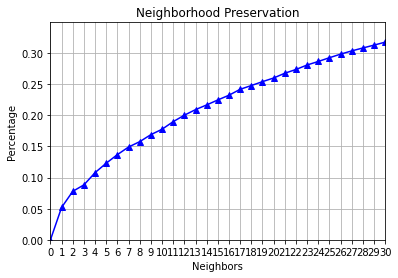

array([0.        , 0.05204082, 0.07789116, 0.08826531, 0.10795918,
       0.12312925, 0.13688047, 0.14910714, 0.15770975, 0.16897959,
       0.17764378, 0.18988095, 0.20023548, 0.20918367, 0.21673469,
       0.2247449 , 0.23235294, 0.24183673, 0.24790548, 0.25413265,
       0.26000972, 0.26767161, 0.27369122, 0.28090986, 0.28657143,
       0.29262166, 0.29833711, 0.30357143, 0.30826882, 0.31285714,
       0.31764319])

In [37]:
neighborhood_preservation(features_arr, matrix_2d)

LAMP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



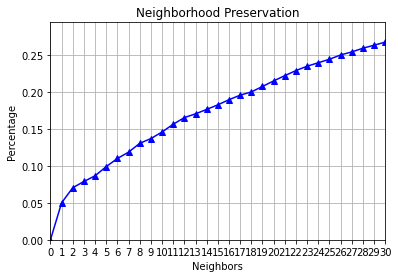

array([0.        , 0.05      , 0.07040816, 0.07882653, 0.08653061,
       0.09897959, 0.10991254, 0.1184949 , 0.13038549, 0.13683673,
       0.14573284, 0.15620748, 0.16522763, 0.17026239, 0.1762585 ,
       0.18246173, 0.18937575, 0.19552154, 0.19989259, 0.20729592,
       0.21482021, 0.22189239, 0.22879326, 0.23465136, 0.23934694,
       0.24407378, 0.24988662, 0.2539723 , 0.25897255, 0.26306122,
       0.26721527])

In [38]:
neighborhood_preservation(features_arr, lamp)

Pekalska

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



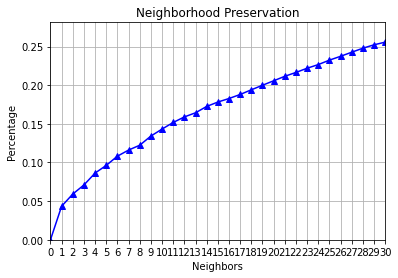

array([0.        , 0.04336735, 0.05918367, 0.07091837, 0.08632653,
       0.0962585 , 0.10816327, 0.11607143, 0.1223356 , 0.13418367,
       0.1432282 , 0.15178571, 0.15894819, 0.16428571, 0.17251701,
       0.17818878, 0.18277311, 0.18798186, 0.19403867, 0.19989796,
       0.20568513, 0.21150278, 0.21650399, 0.22193878, 0.22665306,
       0.23241758, 0.23737717, 0.24267493, 0.24785362, 0.2522449 ,
       0.25569454])

In [33]:
neighborhood_preservation(features_arr, pekalska)

Por hoje é só! Queria ter eu próprio implementado essas medidas de Neighborhood Preservation e Neighborhood Hit, mas o semestre está me apertando de uma maneira `interessante`. Obrigado por ter vindo até aqui, caro leitor. Até a próxima :)